In [1]:
%load_ext autoreload
%autoreload 2

## import all packages and libraries

In [2]:
import os
import math

import numpy as np
import matplotlib.pyplot as plt


import librosa
from tqdm.notebook import tqdm

#### Utility functions

In [3]:
def fft(f):
    Ni = len(f)
    Mi = int(Ni / 2)
    if Mi <= 2:
        return [f[0] + f[1] + f[2] + f[3], 
               f[0] - 1j*f[1] - f[2] + 1j*f[3],
               f[0] - f[1] + f[2] - f[3],
               f[0] + 1j*f[1] - f[2] - 1j*f[3]]
    
    wn = math.cos(2*math.pi/Ni) - 1j*math.sin(2*math.pi/Ni)
    fe = [f[i] for i in range(Ni) if i % 2 == 0]
    fo = [f[i] for i in range(Ni) if i % 2 == 1]
    Fe = fft(fe)
    Fo = fft(fo)
    return [np.around(Fe[i] + (wn**i)*Fo[i], decimals=10) for i in range(Mi)] + [np.around(Fe[i] - (wn**i)*Fo[i], decimals=10) for i in range(Mi)]

def get_audio_data(filename):
    fs = 2**12 # sample rate
    tp = 2 # sampling duration
    N = n = fs*tp # number of samples
    
    # Extract data and sampling rate from file
    recording, fs = librosa.load(filename, sr=fs, duration=tp, mono=True)
    n = len(recording)        
    tp = int(n / fs)

    if tp < 2:
        pad_width = N - len(recording)
        recording = np.pad(recording, pad_width=((0, pad_width),), mode='constant')

        n = len(recording)
        tp = int(n / fs)

    N = fs*tp # number of samples
    x = [np.round(float(recording[i]), 10) for i in range(n)] # input sequence
    return x, tp, n

def get_top_frequencies(fi, X_amp, size):
    fi = np.array(fi)
    X_amp = np.array(X_amp)
    
    return fi[np.argsort(X_amp)[::-1][:size]]

def get_frequency_amplitude(x, tp, N):
    _X = fft(x) # discrete Fourier transform
    X = [np.round(Xi/N, 10) for Xi in _X] # frequency spectrum
    X_amp = [np.absolute(Xi) for Xi in X] # amplitude spectrum

    M = int(N/2)
    ti = [i*tp/N for i in range(N)]
    fi = [i/tp for i in range(M)]
    X_amp = np.array(X_amp[:M])*2
    
    return ti, fi, X_amp

def extract_features(filepath):
    # try:
    audio_features = get_audio_data(filepath)
    if not audio_features:
        return

    x, tp, N = audio_features
    ti, fi, X_amp = get_frequency_amplitude(x, tp, N)
    return ti, x, fi, X_amp

def get_data(data_dir: str) -> np.array:
    # feature list
    X, y = [], []

    # Iterate through each sound file and extract the features 
    for folder in tqdm(os.listdir(data_dir)):
        for file in os.listdir(os.path.join(data_dir, folder)):
            class_label = folder
            file_name = os.path.join(os.path.join(data_dir, folder, file))

            X.append(file_name)
            y.append(class_label)
    
    X, y = map(np.array, [X, y])
    return X, y

def plot_wave(ti, x, fi, X_amp):
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    ax1= plt.subplot(211)
    plt.plot(ti, x)
    plt.xlabel('t (seconds)')
    plt.ylabel('x(t)')
    plt.minorticks_on()
    plt.grid(b=True, which='major', linestyle='-')
    plt.grid(b=True, which='minor', linestyle='--')

    ax2 = plt.subplot(212)
    plt.plot(fi, X_amp)
    plt.xlabel('f (hertz)')
    plt.ylabel('|X(f)|')
    ax2.set_xscale('log')
    plt.minorticks_on()
    plt.grid(b=True, which='major', linestyle='-')
    plt.grid(b=True, which='minor', linestyle='--')

    plt.show()

#### CONSTANTS

In [4]:
# DATA_DIR = os.path.join("data" , "old_guitar_sample")
DATA_DIR = os.path.join("data" , "guitar_sample")

In [5]:
X, y = get_data(DATA_DIR)

feature_size(amplitude) = 4096, label = 0A
top 10 freq = [110.  110.5 219.  218.5 219.5 218.  109.5 217.5 221.  111. ]


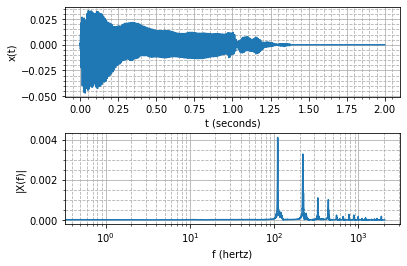

In [15]:
label = "0A"
index = np.where(y==label)[0][0]
ti, x, fi, X_amp = extract_features(X[index])
print(f"feature_size(amplitude) = {len(X_amp)}, label = {y[index]}")
print(f"top 10 freq = {get_top_frequencies(fi, X_amp, 10)}")

plot_wave(ti, x, fi, X_amp)

feature_size(amplitude) = 4096, label = 1A
top 10 freq = [108.5 108.  216.5 216.  109.  107.5 217.  217.5 218.  434. ]


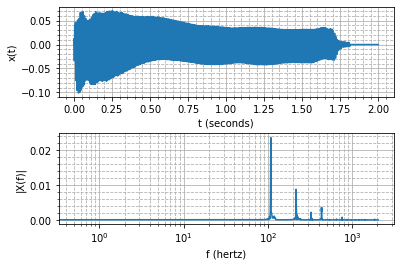

In [14]:
label = "1A"
index = np.where(y==label)[0][0]
ti, x, fi, X_amp = extract_features(X[index])
print(f"feature_size(amplitude) = {len(X_amp)}, label = {y[index]}")
print(f"top 10 freq = {get_top_frequencies(fi, X_amp, 10)}")

plot_wave(ti, x, fi, X_amp)

In [9]:
ti, fi, X_amp = get_frequency_amplitude(x, tp, N)

print(f"shape: ti = {len(ti)}, fi = {len(fi)}, X_amp = {len(X_amp)}", max(X_amp))

shape: ti = 8192, fi = 4096, X_amp = 4096 0.023595093546467258


In [10]:
pressed = get_pressed(fi, X_amp)
print(pressed, 'was pressed.')

  Frequencies detected A[4]: 108.5Hz, 434.0Hz. 0.0
A was pressed.


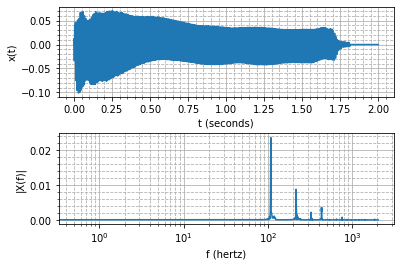

In [11]:
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax1= plt.subplot(211)
plt.plot(ti, x)
plt.xlabel('t (seconds)')
plt.ylabel('x(t)')
plt.minorticks_on()
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='--')

ax2 = plt.subplot(212)
plt.plot(fi, X_amp)
plt.xlabel('f (hertz)')
plt.ylabel('|X(f)|')
ax2.set_xscale('log')
plt.minorticks_on()
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='--')

plt.show()

In [12]:
pressed = get_pressed(fi, X_amp)
print(pressed, 'was pressed.')

  Frequencies detected A[4]: 108.5Hz, 434.0Hz. 0.0
A was pressed.


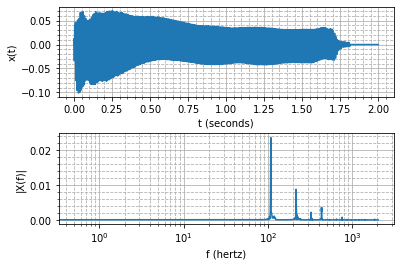

In [13]:
plt.subplots_adjust(wspace=0.4, hspace=0.4)

ax1= plt.subplot(211)
plt.plot(ti, x)
plt.xlabel('t (seconds)')
plt.ylabel('x(t)')
plt.minorticks_on()
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='--')

ax2 = plt.subplot(212)
plt.plot(fi, X_amp)
plt.xlabel('f (hertz)')
plt.ylabel('|X(f)|')
ax2.set_xscale('log')
plt.minorticks_on()
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='--')

plt.show()

In [14]:
max(X_amp)

0.023595093546467258

In [15]:
for label in os.listdir(DATA_DIR):
    print(label)
    labeldir= os.path.join(DATA_DIR, label)

    for filename in os.listdir(labeldir):
        filepath = os.path.join(DATA_DIR, label, filename)

        audio_features = get_audio_data(filepath, quiet=True)
        if not audio_features:
            continue

        x, tp, N = audio_features
        ti, fi, X_amp = get_frequency_amplitude(x, tp, N)

        pressed = get_pressed(fi, X_amp)
    #     print(pressed, 'was pressed.')

0A
  Frequencies detected A[4]: 110.0Hz, 330.0Hz. 0.0
  Frequencies detected B[1]: 224.5Hz, 449.5Hz. 0.0
  Frequencies detected A[4]: 118.5Hz, 356.0Hz. 0.0
  Frequencies detected A[4]: 122.5Hz, 367.5Hz. 0.0
  Frequencies detected A[4]: 125.5Hz, 373.5Hz. 0.0
  Frequencies detected D[3]: 131.0Hz, 389.5Hz. 0.0
  Frequencies detected D[3]: 134.5Hz, 405.0Hz. 0.0
  Frequencies detected D[3]: 138.5Hz, 415.0Hz. 0.0
  Frequencies detected D[3]: 134.0Hz, 402.5Hz. 0.0
  Frequencies detected D[3]: 142.0Hz, 429.5Hz. 0.0
  Frequencies detected A[4]: 107.0Hz, 321.5Hz. 0.0
  Frequencies detected B[1]: 257.5Hz, 644.0Hz. 0.0
  Frequencies detected A[4]: 119.5Hz, 359.0Hz. 0.0
  Frequencies detected A[4]: 113.5Hz, 321.5Hz. 0.0
  Frequencies detected G[2]: 199.5Hz, 399.5Hz. 0.0
  Frequencies detected EH[0]: 290.0Hz, 774.5Hz. 0.0
  Frequencies detected B[1]: 248.5Hz, 473.0Hz. 0.0
  Frequencies detected B[1]: 239.5Hz, 482.0Hz. 0.0
  Frequencies detected D[3]: 138.5Hz, 338.5Hz. 0.0
  Frequencies detected D[3]

  Frequencies detected B[1]: 246.0Hz, 736.5Hz. 0.0
  Frequencies detected B[1]: 246.5Hz, 737.0Hz. 0.0
  Frequencies detected B[1]: 246.5Hz, 737.5Hz. 0.0
  Frequencies detected B[1]: 247.0Hz, 735.5Hz. 0.0
  Frequencies detected B[1]: 246.5Hz, 738.0Hz. 0.0
  Frequencies detected B[1]: 246.0Hz, 1227.0Hz. 0.0
  Frequencies detected B[1]: 246.5Hz, 737.5Hz. 0.0
  Frequencies detected B[1]: 246.5Hz, 736.5Hz. 0.0
  Frequencies detected B[1]: 246.5Hz, 737.0Hz. 0.0
  Frequencies detected B[1]: 246.5Hz, 738.0Hz. 0.0
  Frequencies detected B[1]: 247.0Hz, 736.5Hz. 0.0
  Frequencies detected B[1]: 247.0Hz, 736.5Hz. 0.0
1D
  Frequencies detected D[3]: 145.0Hz, 436.0Hz. 0.0
  Frequencies detected D[3]: 145.0Hz, 436.0Hz. 0.0
  Frequencies detected D[3]: 145.0Hz, 436.5Hz. 0.0
  Frequencies detected D[3]: 145.0Hz, 436.0Hz. 0.0
  Frequencies detected D[3]: 145.0Hz, 436.5Hz. 0.0
  Frequencies detected D[3]: 145.0Hz, 436.0Hz. 0.0
  Frequencies detected D[3]: 145.0Hz, 436.0Hz. 0.0
  Frequencies detected D[3]

KeyboardInterrupt: 

In [ ]:
for label in os.listdir(DATA_DIR):
    print(label)
    labeldir= os.path.join(DATA_DIR, label)

    for filename in os.listdir(labeldir):
        filepath = os.path.join(DATA_DIR, label, filename)

        audio_features = get_audio_data(filepath, quiet=True)
        if not audio_features:
            continue

        x, tp, N = audio_features
        ti, fi, X_amp = get_frequency_amplitude(x, tp, N)

        pressed = get_pressed(fi, X_amp)
    #     print(pressed, 'was pressed.')

In [ ]:
np.log2(4096)